Import the dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and preprocessing

In [4]:
#loading the dataset to pandas dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#printing the last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the number of missing values in each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#Statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation::: 1. Positive correlation 2. Negative correlation

In [11]:
correlation = gold_data.corr()

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_82089/1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


Constructing a heat map to undersatnd the correlation between the features

<Axes: >

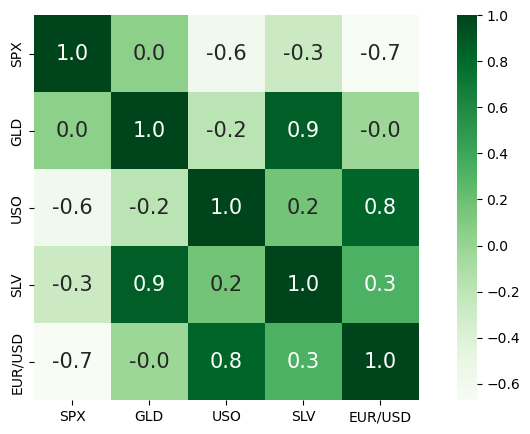

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [14]:
#correlation values for gold price prediction
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


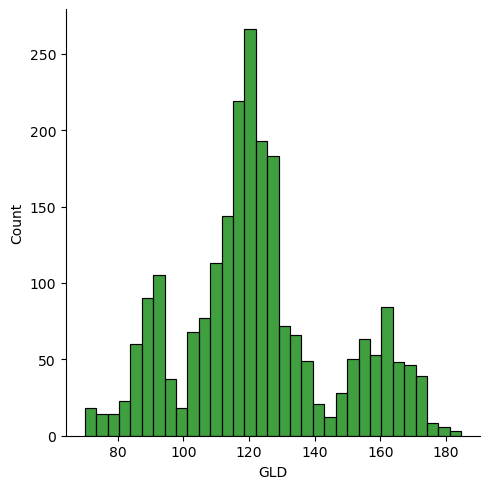

In [19]:
#Checking the distribution of the gold price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target variable

In [20]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training::: RandomForestsRegressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.6024991   82.16199967 115.95799995 127.51410054 120.63830128
 154.71519802 150.20509883 126.21909999 117.79679872 125.99380096
 116.3931007  171.05640104 141.11659782 167.86469818 115.37879999
 117.23330042 139.23680267 170.35570044 159.67350315 156.45839957
 155.18560035 125.3566999  175.4541003  157.55480334 125.2037006
  93.57019977  77.68220028 120.41339989 119.04319943 167.50420042
  88.25530058 125.24989988  91.1509008  117.70410028 121.08179937
 136.4004006  115.49700107 115.05940053 146.28170001 107.15740097
 104.54170255  87.13869783 126.63490076 117.82409953 152.35769932
 119.56910011 108.32879986 108.33829858  93.22100049 127.1729976
  75.01760037 113.6172995  121.31579979 111.2512992  118.91519892
 120.4562997  159.06569986 168.58470065 146.99669693  85.92609857
  94.47830026  86.74109877  90.70920007 119.00730062 126.37510028
 127.38359983 168.30959988 122.15589945 117.38109897  98.40160008
 168.45810227 142.8366987  131.92970288 121.11820208 120.81889955
 119.8523004

In [30]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9885896393848599


Compare the actual values and predicted values through visualization

In [31]:
Y_test = list(Y_test)

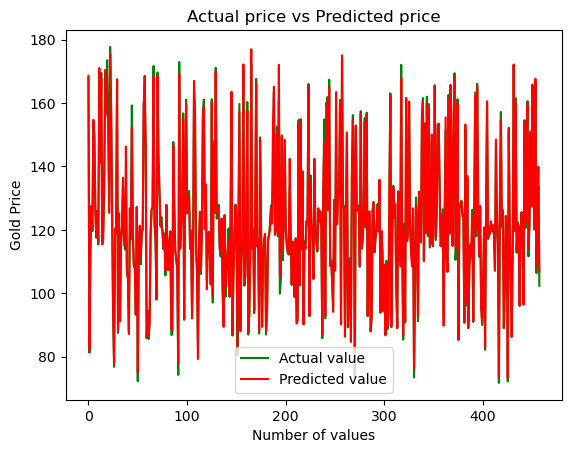

In [38]:
plt.plot(Y_test, color = 'green', label = 'Actual value')
plt.plot(test_data_prediction, color = 'red', label = 'Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()